In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

# 라이브러리 버전 출력
print(sklearn.__version__, np.__version__)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

1.2.2 1.25.2


In [ ]:
# 캘리포니아 주택 데이터 로드
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [ ]:
# 데이터 분할: 훈련 세트와 테스트 세트
X_train, X_test, y_train, y_test = train_test_split(housing.data[:, 0:1], housing.target, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15480, 1) (5160, 1) (15480,) (5160,)


basic regression

In [ ]:
# 기본 선형 회귀 모델 초기화 및 학습
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.47083837938023365

In [ ]:
# 테스트 세트에 대한 결정 계수(R^2) 계산
y_pred = lr.predict(X_test)
r2 = 1 - ((y_test - y_pred)**2).sum() / ((y_test - y_test.mean())**2).sum()
print(r2)

0.47083837938023365


In [ ]:
# 회귀 모델의 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[0.41788087] 0.44967564199686194


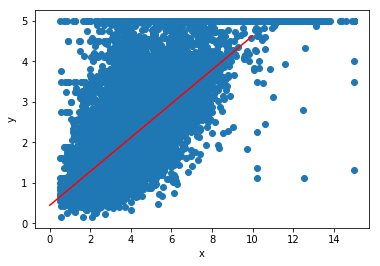

In [ ]:
# 훈련 데이터와 회귀선 시각화
plt.scatter(X_train, y_train)
plt.plot([0, 10], [lr.intercept_, 10 * lr.coef_ + lr.intercept_], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Logistic Regression

1. 데이터를 로드하고 훈련/테스트 세트로 분할합니다.<br>
2. Feature scaling을 수행하여 데이터를 표준화합니다.<br>
3. Logistic Regression 모델을 초기화하고 훈련합니다.<br>
4. 테스트 데이터에 대한 예측을 수행하고 정확도를 계산합니다.<br>
5. 시각화를 통해 테스트 데이터와 분류 경계를 표시합니다.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Iris 데이터셋을 불러옵니다.
iris = load_iris()
X, y = iris.data[:, :2], iris.target

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression 모델을 초기화하고 훈련합니다.
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# 훈련된 모델로 테스트 데이터에 대한 예측을 수행합니다.
y_pred = log_reg.predict(X_test)

# 테스트 정확도를 계산합니다.
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9


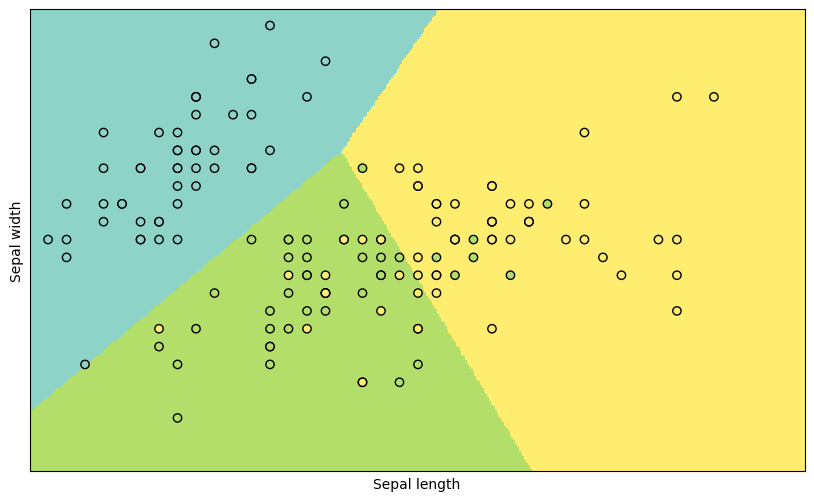

In [13]:
# 테스트 데이터를 시각화합니다.
plt.figure(figsize=(10, 6))

# 테스트 데이터 포인트를 그립니다.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', label='Test Data')

# 분류 경계를 그립니다.
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4,3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set3)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.show()